In [29]:
import neuscitk.neuscitk as ntk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
def compare_neurons(group_1: ntk.SortedSpikes, group_2: ntk.SortedSpikes) -> tuple[np.ndarray, np.ndarray]:
    '''
    maps the waveforms from group_2 into the PCA space of group_1

    Parameters
    ------------
    group_1 : SortedSpikes
        the group of spikes we will use to define our PCA space, output of ntk.sort_spikes
    
    group_2 : SortedSpikes
        the group of spikes we want to map into group_1s PCA space
    '''

    pca = PCA().fit(group_1._waveforms)
    group_1_transformed = pca.transform(group_1._waveforms)
    group_2_transformed = pca.transform(group_2._waveforms)

    group_1_labels = group_1.labels
    group_2_labels = group_2.labels

    fig = plt.figure(figsize=(8, 8))
    counter = 0
    for idx, cluster in enumerate(np.unique(group_1_labels)):
        mask = group_1_labels == cluster
        plt.scatter(
            group_1_transformed[mask, 0],
            group_1_transformed[mask, 1],
            c=f'C{counter}',
            alpha=0.5,
            edgecolors='black',
            linewidths=0.5,
            label=f'Group 1 cluster {cluster}'
        )
        counter += 1
    
    for idx, cluster in enumerate(np.unique(group_2_labels)):
        mask = group_2_labels == cluster
        plt.scatter(
            group_2_transformed[mask, 0],
            group_2_transformed[mask, 1],
            c=f'C{counter}',
            alpha=0.5,
            edgecolors='black',
            linewidths=0.5,
            marker='X',
            label=f'Group 2 cluster {cluster}'
        )
        counter += 1
    plt.xlabel('Group 1 PC1')
    plt.ylabel('Group 2 PC2')
    plt.legend()
    plt.show()

In [2]:
dataset = ntk.LabChartDataset('./assets/datasets/Lab1_302_Demo.mat')

In [3]:
spontaneous_data = dataset.concat_blocks(np.arange(-10, 0))

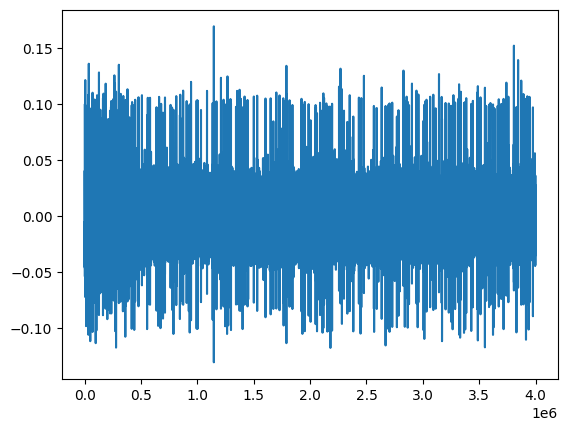

In [4]:
plt.plot(spontaneous_data[0])

In [5]:
spontaneous_sorted_spikes = ntk.sort_spikes(spontaneous_data[0], dataset.fs)

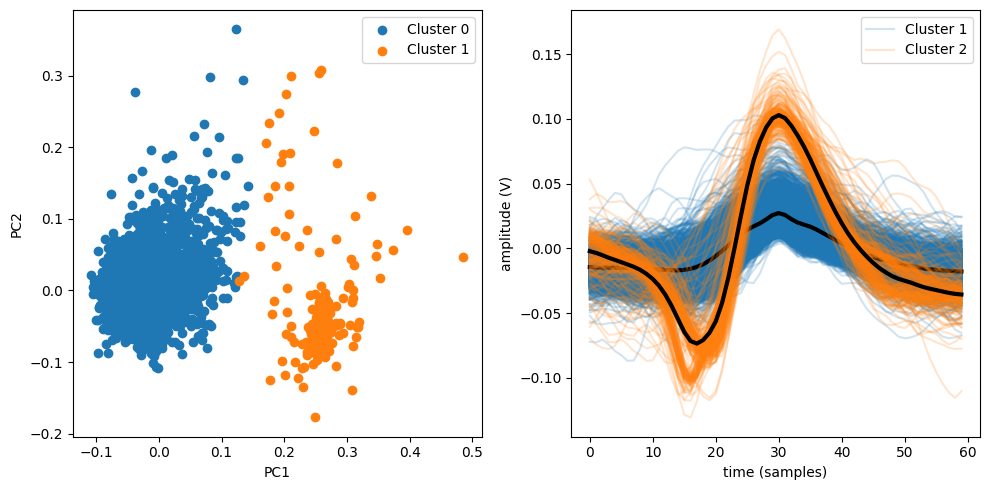

In [6]:
spontaneous_sorted_spikes.plot_clusters()

In [7]:
freq_ramp_data = dataset.concat_blocks(np.arange(1, 11))

In [47]:
freq_ramp_spikes = ntk.sort_spikes(freq_ramp_data[0], dataset.fs, threshold_multiplier=4, ma_window=0.1)

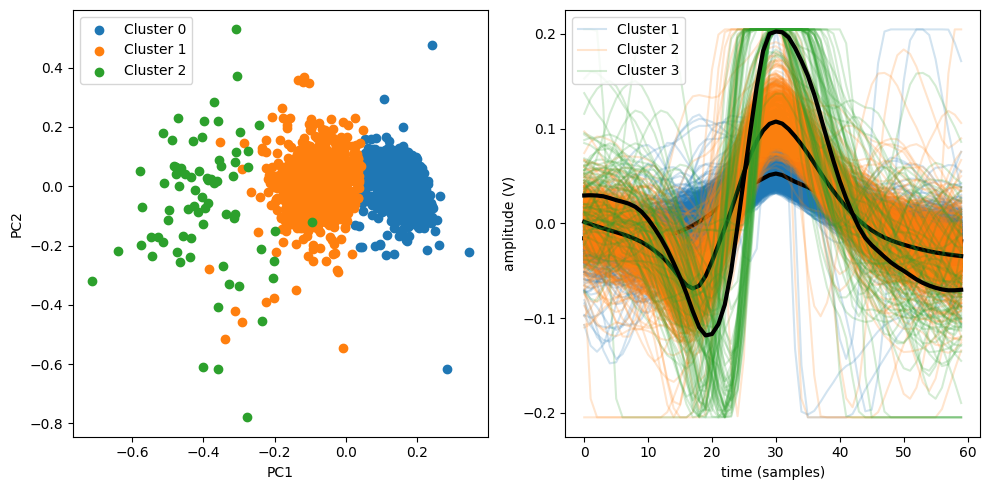

In [48]:
freq_ramp_spikes.plot_clusters()

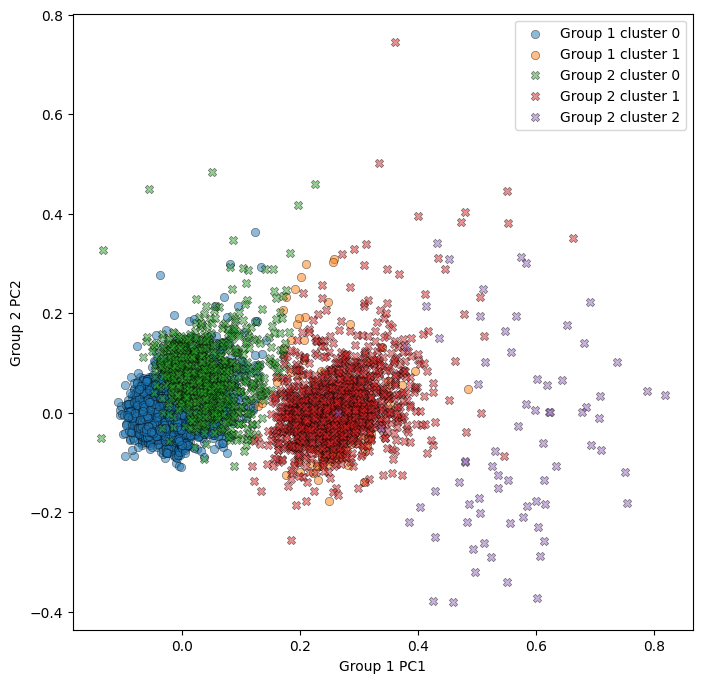

In [49]:
compare_neurons(spontaneous_sorted_spikes, freq_ramp_spikes)

In [51]:
all_data = dataset.concat_blocks(np.arange(1, len(dataset.data['Channel 1']) + 1))

In [54]:
sorted_spikes = ntk.sort_spikes(all_data[0], dataset.fs)

In [55]:
dataset